In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import lightgbm as lgb

In [43]:
df = pd.read_csv('diabetes.csv')

In [5]:
lgbc = lgb.LGBMClassifier()

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in cols:
    df[i] = df[i].replace({0:df[i].median()})

In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
from sklearn.model_selection import train_test_split

X =df.drop('Outcome', axis=1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [49]:
lgbc.fit(X_train,y_train)

y_pred = lgbc.predict(X_test)
y_prob = lgbc.predict_proba(X_test)[:,1]

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

print('Accuracy on Test set : ', accuracy_score(y_test,y_pred))
print('AUC on Test set : ', roc_auc_score(y_test,y_prob))

Accuracy on Test set :  0.7532467532467533
AUC on Test set :  0.8275584206285254


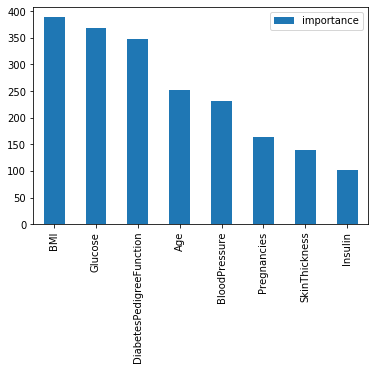

In [52]:
cols = X.columns
lgbc.feature_importances_

fi = pd.DataFrame(lgbc.feature_importances_,index=cols,columns=['importance'])

fi = fi.sort_values('importance', ascending=False)
fi.plot.bar()
plt.show()

In [53]:
### Hyperparameter Tuning

In [62]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

lgbc=lgb.LGBMClassifier(random_state=1)

params ={'n_estimators':sp_randint(5,250),
         'max_depth':sp_randint(2,20),
         'num_leaves':sp_randint(5,50),
         'min_child_samples':sp_randint(1,20)}

rand_search_lgbc=RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1)

rand_search_lgbc.fit(X,y)
print(rand_search_lgbc.best_params_)

{'max_depth': 2, 'min_child_samples': 17, 'n_estimators': 134, 'num_leaves': 17}


In [61]:
lgbc=lgb.LGBMClassifier(**rand_search_lgbc.best_params_, random_state=1)

lgbc.fit(X_train,y_train)

y_pred_train= lgbc.predict(X_train)
y_pred_test=lgbc.predict(X_test)


y_prob_test=lgbc.predict_proba(X_test)[:,1] #used to calculate AUC
y_prob_train=lgbc.predict_proba(X_train)[:,1]


print('Accuracy of  LGBM on Train: ',accuracy_score(y_pred_train,y_train))
print('Accuracy of LGBM on Test: ',accuracy_score(y_pred_test,y_test))

print('AUC of LGBM Train:',roc_auc_score(y_train,y_prob_train))
print('AUC of LGBM Test:',roc_auc_score(y_test,y_prob_test))

Accuracy of  LGBM on Train:  0.8621973929236499
Accuracy of LGBM on Test:  0.7792207792207793
AUC of LGBM Train: 0.9298416226729647
AUC of LGBM Test: 0.8661563255439162


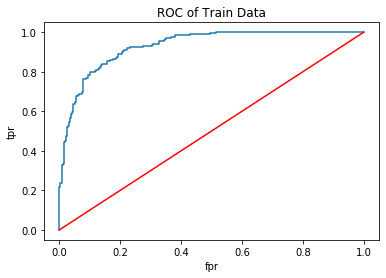

In [60]:
fpr,tpr,thresholds=roc_curve(y_train,y_prob_train)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC of Train Data')
plt.show()

### Naive Bayes Classifier

In [63]:
df = pd.read_csv('SMSSpamCollection.csv')
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [65]:
df['Class'] = df['Class'].map({'ham':0,'spam':1})

In [85]:
X = df['sms']
y = df['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [87]:
vect.fit(X_train)


X_train_tr = vect.transform(X_train)
X_test_tr = vect.transform(X_test)

In [88]:
X_train_tr

<3900x6904 sparse matrix of type '<class 'numpy.int64'>'
	with 30119 stored elements in Compressed Sparse Row format>

In [96]:
X_train.shape

(3900,)

In [95]:
y_train.shape

(3900,)

In [81]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object

In [93]:
X_train_tr

<3900x6904 sparse matrix of type '<class 'numpy.int64'>'
	with 30119 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train_tr,y_train)
y_pred = bnb.predict(X_test_tr)
y_pred_proba = bnb.predict_proba(X_test_tr)[:,1]


print('Accuracy score on Test: ', accuracy_score(y_test,y_pred))
print('Accuracy score on Test: ', roc_auc_score(y_test,y_pred_proba))

Accuracy score on Test:  0.9730861244019139
Accuracy score on Test:  0.9963155038292226


### Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in cols:
    df[i] = df[i].replace({0:df[i].median()})

In [5]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

NameError: name 'X' is not defined

In [10]:
X =df.drop('Outcome', axis=1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.svm import SVC
svc = SVC(gamma = 'auto',probability=True)

svc.fit(X_train,y_train)


y_pred_train= svc.predict(X_train)
y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[:,1] #used to calculate AUC
y_prob_train=svc.predict_proba(X_train)[:,1]

print('Accuracy of Decision Tree on Train: ',accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree on Test: ',accuracy_score(y_pred,y_test))

print('AUC of Train:',roc_auc_score(y_train,y_prob_train))
print('AUC of Test:',roc_auc_score(y_test,y_prob))

Accuracy of Decision Tree on Train:  1.0
Accuracy of Decision Tree on Test:  0.6320346320346321
AUC of Train: 0.0
AUC of Test: 0.29335213537469784


In [12]:
y_prob_train = svc.predict_proba(X_train)

### Hyperparameter Tuning SVM

In [14]:
from sklearn.model_selection import RandomizedSearchCV
svc =SVC(probability=True)


params ={'C':np.logspace(-4,4,10000),
         'gamma':np.logspace(-4,4,10000)}

rand_search_svc=RandomizedSearchCV(svc,param_distributions=params,cv=3,random_state=1)

rand_search_svc.fit(X,y)
print(rand_search_svc.best_params_)

{'gamma': 0.0009240523368366414, 'C': 2.731766936839203}


In [15]:
from sklearn.svm import SVC
svc = SVC(**rand_search_svc.best_params_, probability=True,random_state=1)

svc.fit(X_train,y_train)

y_pred_train= svc.predict(X_train)
y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[:,1] #used to calculate AUC
y_prob_train=svc.predict_proba(X_train)[:,1]

print('Accuracy of Decision Tree on Train: ',accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree on Test: ',accuracy_score(y_pred,y_test))

print('AUC of Train:',roc_auc_score(y_train,y_prob_train))
print('AUC of Test:',roc_auc_score(y_test,y_prob))

Accuracy of Decision Tree on Train:  0.8547486033519553
Accuracy of Decision Tree on Test:  0.7532467532467533
AUC of Train: 0.9124525331110493
AUC of Test: 0.8138597904915391
